# Рубежный контроль №2, Грызин Алексей РТ5-61Б, Вариант №6
## Методы построения моделей машинного обучения.

### Задание:
 1. Выберите набор данных (датасет) для решения задачи классификации или регрессии.
 2. В случае необходимости проведите удаление или заполнение пропусков и кодирование категориальных признаков.
 3. С использованием метода train_test_split разделите выборку на обучающую и тестовую.
 4. Обучите следующие модели:
    - одну из линейных моделей (линейную или полиномиальную регрессию при решении задачи регрессии, логистическую регрессию при решении задачи классификации);
    - SVM;
    - дерево решений.
 5. Оцените качество моделей с помощью двух подходящих для задачи метрик. Сравните качество полученных моделей.
 6. Постройте график, показывающий важность признаков в дереве решений.
 7. Визуализируйте дерево решений или выведите правила дерева решений в текстовом виде.

### Импорт необходимых библиотек и загрузка набора данных

In [105]:
from io import StringIO 
from IPython.display import Image
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import export_text, export_graphviz
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pydotplus

df = pd.read_csv('data/Admission_Predict.csv')

### Анализ датасета

#### The parameters included are :

- GRE Scores ( out of 340 )
- TOEFL Scores ( out of 120 )
- University Rating ( out of 5 )
- Statement of Purpose and Letter of Recommendation Strength ( out of 5 )
- Undergraduate GPA ( out of 10 )
- Research Experience ( either 0 or 1 )
- Chance of Admit ( ranging from 0 to 1 )

In [106]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [107]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [109]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

> Как видно, пропуски отсутствуют, а значит нет необходимости в удалении колонок или строк.

#### Диаграмма Jointplot

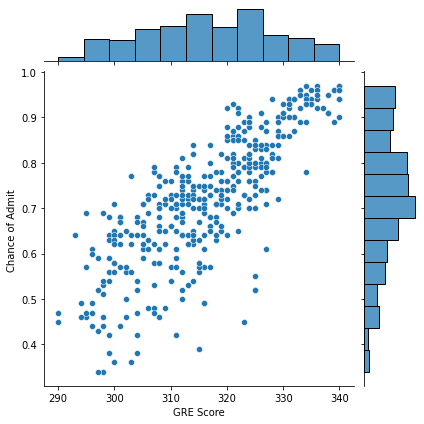

In [110]:
sns.jointplot(x="GRE Score", y="Chance of Admit ", data=df)

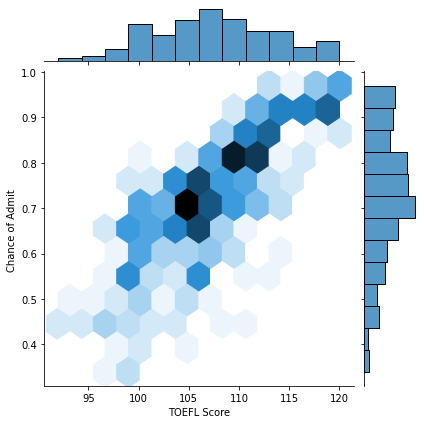

In [111]:
sns.jointplot(x="TOEFL Score", y="Chance of Admit ", data=df, kind='hex')


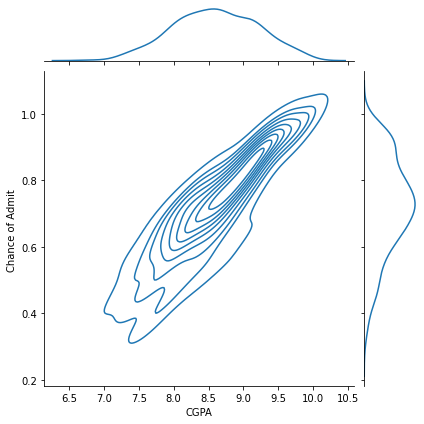

In [112]:
sns.jointplot(x="CGPA", y="Chance of Admit ", data=df, kind="kde")

### Корреляционный анализ

- В данном датасете целевым признаком является параметр "Chance of Admit". Рассмотрим, как остальные параметры с ним коррелируют.

<AxesSubplot:>

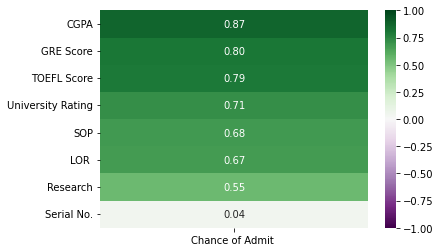

In [113]:
chance_of_admit = pd.DataFrame(df.corr()["Chance of Admit "].sort_values(ascending=False)[1:])

sns.heatmap(chance_of_admit, annot=True,  fmt='.2f', cmap=plt.cm.PRGn, vmin=-1, vmax=1)


In [114]:
df.corr()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.097526,-0.147932,-0.169948,-0.166932,-0.088221,-0.045608,-0.063138,0.042336
GRE Score,-0.097526,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,-0.147932,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,-0.169948,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,-0.166932,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,-0.088221,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,-0.045608,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,-0.063138,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.042336,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


<AxesSubplot:>

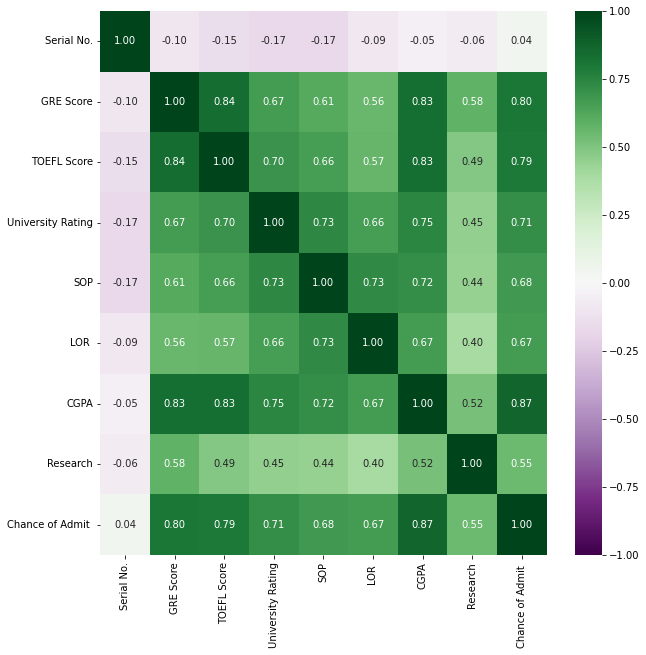

In [115]:
fig, ax = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(10, 10))

sns.heatmap(df.corr(), annot=True,  fmt='.2f', cmap=plt.cm.PRGn, vmin=-1, vmax=1)

Выше представлены матрица корреляций признаков между собой, а также матрица корреляции для целевого признака. Из этих матриц можно сделать следующие выводы:

- Значение параметра "Serial No" никак не коррелирует со всеми остальными параметрами. В дальнейшем этот столбец можно будет опустить.
- Целевой признак достаточно неплохо коррелирует (положительно) со всеми параметрами. Очень высокая положительная корреляция наблюдается с "CGPA", "GRE Score", "TOEFL Score". 
- Также высокая корреляция наблюдается между парами этих параметров, а значит во избежании мультиколлинеарности необходимо выбрать один из этих признаков. Логичнее всего оставить "CGPA", т.к. с ним у целевого признака наблюдается наибольшая связь.

> В результате корреляционного анализа было принято решение в моделях машинного обучения для прогноза целевого признака использовать параметры: "CGPA", "University Rating", "SOP", "LOR" и "Research".

In [116]:
# Удаление лишних колонок
df_corr = df.drop(columns=["Serial No.", "GRE Score", "TOEFL Score"])
df_corr.head()

,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,4,4.5,4.5,9.65,1,0.92
1,4,4.0,4.5,8.87,1,0.76
2,3,3.0,3.5,8.00,1,0.72
3,3,3.5,2.5,8.67,1,0.80
4,2,2.0,3.0,8.21,0,0.65


In [117]:
# Масштабирование
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(X=df_corr.drop(columns=["Chance of Admit "]), y=df_corr["Chance of Admit "])

# Вставка отмасштабированных данных
df_scaled = pd.DataFrame(scaled_features, columns=df_corr.columns[:-1])
df_scaled.head()

,University Rating,SOP,LOR,CGPA,Research
0,0.75,0.875,0.875,0.913462,1.0
1,0.75,0.750,0.875,0.663462,1.0
2,0.50,0.500,0.625,0.384615,1.0
3,0.50,0.625,0.375,0.599359,1.0
4,0.25,0.250,0.500,0.451923,0.0


In [118]:
# Разбиение выборки на обучающую и тестовую 
x = df_scaled
y = df_corr["Chance of Admit "]

x_train: pd.DataFrame
x_test: pd.DataFrame
y_train: pd.Series
y_test: pd.Series

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=8)

### Дерево решений

In [119]:
# Гиперпараметры для оптимизации
parameters_to_tune = {
    "max_depth": np.arange(1, 5, 1, dtype=int),
    "min_samples_leaf": np.linspace(0.01, 0.1, 10),
    "max_features": [0.2, 0.4, 0.6, 0.8, "auto", "sqrt", "log2"],
}

In [120]:
%%time
# Оптимизация гиперпараметров
dtr_gs = GridSearchCV(DecisionTreeRegressor(criterion='absolute_error', random_state=8),
                      parameters_to_tune, cv=2, scoring='neg_mean_absolute_error')
dtr_gs.fit(x_train, y_train)

CPU times: user 1.2 s, sys: 7.18 ms, total: 1.21 s
Wall time: 1.21 s


GridSearchCV(cv=2,
             estimator=DecisionTreeRegressor(criterion='absolute_error',
                                             random_state=8),
             param_grid={'max_depth': array([1, 2, 3, 4]),
                         'max_features': [0.2, 0.4, 0.6, 0.8, 'auto', 'sqrt',
                                          'log2'],
                         'min_samples_leaf': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ])},
             scoring='neg_mean_absolute_error')

In [121]:
# Лучшее значение параметров
dtr_gs.best_params_

{'max_depth': 4,
 'max_features': 'auto',
 'min_samples_leaf': 0.030000000000000006}

In [122]:
# Лучшее значение метрики
-dtr_gs.best_score_

0.052312500000000005

In [123]:
# Обучение модели
dt_regressor = dtr_gs.best_estimator_
dt_regressor.fit(x_train, y_train)

DecisionTreeRegressor(criterion='absolute_error', max_depth=4,
                      max_features='auto',
                      min_samples_leaf=0.030000000000000006, random_state=8)

In [124]:
# Предсказания модели регрессора на основе дерева решений
dt_pred = dt_regressor.predict(x_test)

In [125]:
# Визуализация дерева с помощью текста
tree_rules = export_text(dt_regressor, feature_names=list(x_train.columns))
print(tree_rules)

|--- CGPA <= 0.68
|   |--- CGPA <= 0.38
|   |   |--- CGPA <= 0.28
|   |   |   |--- University Rating <= 0.12
|   |   |   |   |--- value: [0.49]
|   |   |   |--- University Rating >  0.12
|   |   |   |   |--- value: [0.45]
|   |   |--- CGPA >  0.28
|   |   |   |--- SOP <= 0.31
|   |   |   |   |--- value: [0.56]
|   |   |   |--- SOP >  0.31
|   |   |   |   |--- value: [0.61]
|   |--- CGPA >  0.38
|   |   |--- CGPA <= 0.47
|   |   |   |--- Research <= 0.50
|   |   |   |   |--- value: [0.64]
|   |   |   |--- Research >  0.50
|   |   |   |   |--- value: [0.68]
|   |   |--- CGPA >  0.47
|   |   |   |--- CGPA <= 0.59
|   |   |   |   |--- value: [0.70]
|   |   |   |--- CGPA >  0.59
|   |   |   |   |--- value: [0.76]
|--- CGPA >  0.68
|   |--- CGPA <= 0.76
|   |   |--- University Rating <= 0.62
|   |   |   |--- value: [0.80]
|   |   |--- University Rating >  0.62
|   |   |   |--- CGPA <= 0.72
|   |   |   |   |--- value: [0.82]
|   |   |   |--- CGPA >  0.72
|   |   |   |   |--- value: [0.86]
|  

In [126]:
# Визуализация дерева
def get_png_tree(tree_model_param, feature_names_param):
    dot_data = StringIO()
    export_graphviz(tree_model_param, out_file=dot_data, feature_names=feature_names_param,
                    filled=True, rounded=True, special_characters=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph.create_png()

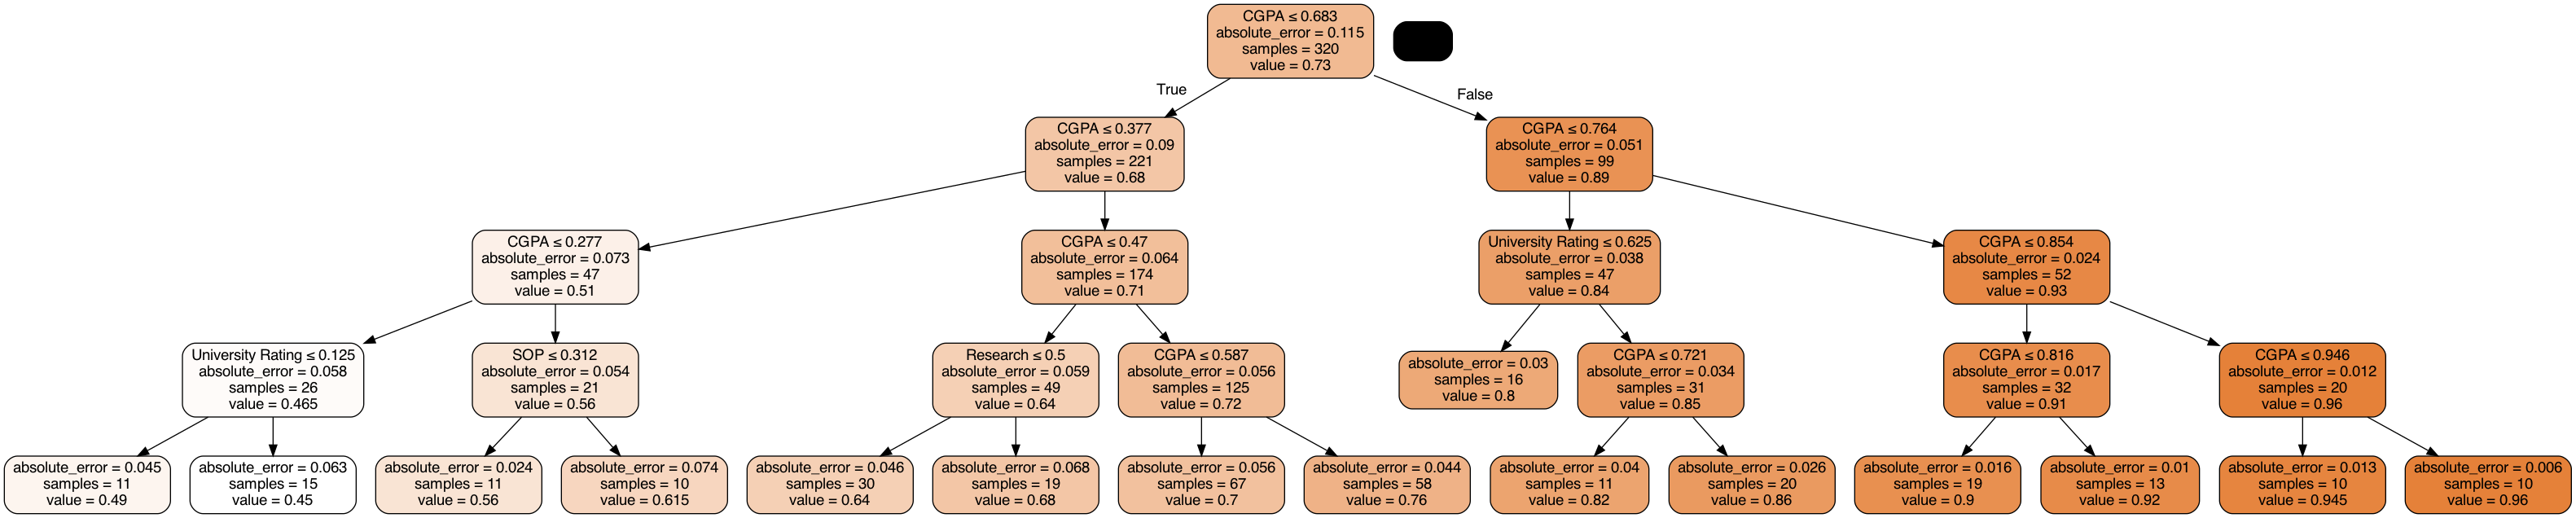

In [127]:
Image(get_png_tree(dt_regressor, x_train.columns), height='100%')

In [128]:
# Важность признаков
dt_regressor.feature_importances_

array([0.01335056, 0.00602929, 0.        , 0.97114556, 0.00947459])

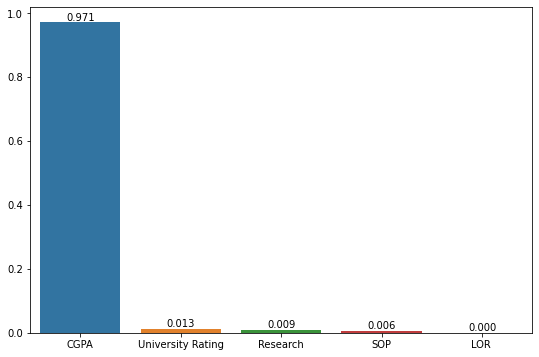

In [253]:
# Визуализация важности признаков
from operator import itemgetter

def plot_feature_importances(feature_names, feature_importances):
    feature_importance_list = list(zip(feature_names, feature_importances))
    sorted_list = sorted(feature_importance_list, key=itemgetter(1), reverse=True)
    feature_order = [x for x, _ in sorted_list]

    plt.figure(figsize=(9,6))
    bar_plot = sns.barplot(x=feature_names, y=feature_importances, order=feature_order)
    bar_plot.bar_label(bar_plot.containers[-1], fmt='%.3f')
    plt.show()
    
plot_feature_importances(x.columns.values, dt_regressor.feature_importances_)

### Градиентный бустинг

In [254]:
# Гиперпараметры для оптимизации
parameters_to_tune = {
    "n_estimators": [5, 10, 15],
    "learning_rate": np.linspace(0.1, 0.3, 3),
    "min_samples_split": np.arange(2, 5, 1),
    "max_depth": np.arange(1, 10, 1),
}


In [255]:
%%time
# Оптимизация гиперпараметров
gbr_gs = GridSearchCV(GradientBoostingRegressor(random_state=3),
                      parameters_to_tune, cv=4, scoring='neg_root_mean_squared_error')
gbr_gs.fit(x_train, y_train)

CPU times: user 5.25 s, sys: 59.8 ms, total: 5.31 s
Wall time: 5.17 s


GridSearchCV(cv=4, estimator=GradientBoostingRegressor(random_state=3),
             param_grid={'learning_rate': array([0.1, 0.2, 0.3]),
                         'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_split': array([2, 3, 4]),
                         'n_estimators': [5, 10, 15]},
             scoring='neg_root_mean_squared_error')

In [256]:
# Лучшее значение параметров
gbr_gs.best_params_

{'learning_rate': 0.3,
 'max_depth': 2,
 'min_samples_split': 2,
 'n_estimators': 10}

In [257]:
# Лучшее значение метрики
gbr_gs.best_score_

-0.06563047586464989

In [258]:
# Обучение модели
gb_regressor : GradientBoostingRegressor= gbr_gs.best_estimator_
gb_regressor.fit(x_train, y_train)

GradientBoostingRegressor(learning_rate=0.3, max_depth=2, n_estimators=10,
                          random_state=3)

In [259]:
# Предсказания модели регрессора на основе градиентного бустинга
gb_pred = gb_regressor.predict(x_test)

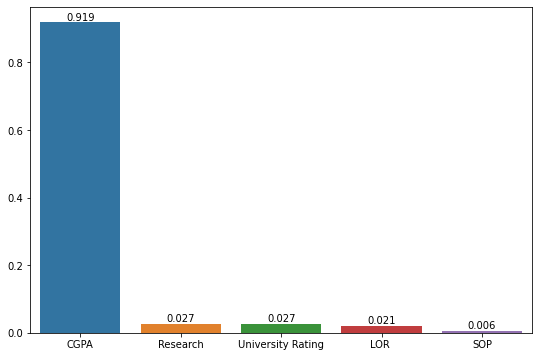

In [260]:
# Визуализация важности признаков
plot_feature_importances(x.columns.values, gb_regressor.feature_importances_)

### Оценка качества моделей

In [261]:
# Функция для оценки качества моделей
def model_scoring(y_true, y_pred):
    print("MAE: {};".format(mean_absolute_error(y_true, y_pred)))
    print("MSE: {};".format(mean_squared_error(y_true, y_pred)))
    print("R2: {}.".format(r2_score(y_true, y_pred)))

In [262]:
# Оценка качества модели
print("Дерево решений:")
model_scoring(y_test, dt_pred)

Дерево решений:
MAE: 0.058812500000000004;
MSE: 0.0074515625;
R2: 0.6081859477685331.


In [263]:
# Оценка качества модели
print("Градиентный бустинг:")
model_scoring(y_test, gb_pred)

Градиентный бустинг:
MAE: 0.0584475667009281;
MSE: 0.006298609193659424;
R2: 0.668809918511712.


> Обе модели показали неплохие результаты в решении задачи регрессии на заданном наборе данных, но градиентный бустинг имеет лучшие результаты, по сравнению с деревом решений.